In [187]:
import sys
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt


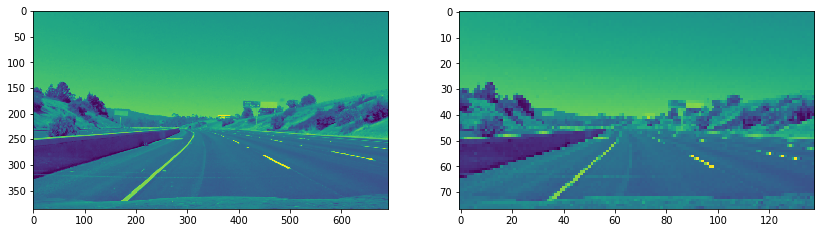

In [188]:
im = ndimage.imread('real.png', mode='L')

plt.figure(figsize=(14,7))
im2 = ndimage.zoom(im,0.2)
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(im2)

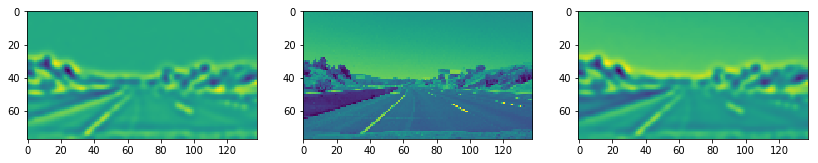

In [189]:

blurred_f = ndimage.gaussian_filter(im2.astype(np.float), 2)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(blurred_f - filter_blurred_f)
plt.subplot(132)
plt.imshow(im2)
plt.subplot(133)
plt.imshow(sharpened)

array([[ 0.67678811,  0.67505662,  0.67214276, ...,  0.62445799,
         0.62452826,  0.62431496],
       [ 0.67907153,  0.6779628 ,  0.67561506, ...,  0.6271418 ,
         0.62634567,  0.62586341],
       [ 0.68172587,  0.68144184,  0.67983933, ...,  0.63082583,
         0.62976874,  0.6296718 ],
       ..., 
       [ 0.57281053,  0.57535164,  0.57755563, ...,  0.60946476,
         0.6384935 ,  0.66552828],
       [ 0.59297123,  0.59383724,  0.59248969, ...,  0.57415895,
         0.60644268,  0.63481743],
       [ 0.60614395,  0.60376283,  0.59720349, ...,  0.53213005,
         0.56692244,  0.59524691]])

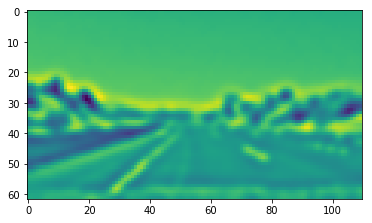

In [190]:
tolink = ndimage.zoom(sharpened,0.8)
n = (tolink - tolink.min())/(tolink.max() - tolink.min())
plt.imshow(n)
n

{'boxes': [<matplotlib.lines.Line2D at 0x7ff62fed1250>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff62ff287d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff62fe12290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff62ff28b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff62fed1310>,
  <matplotlib.lines.Line2D at 0x7ff62fed1110>]}

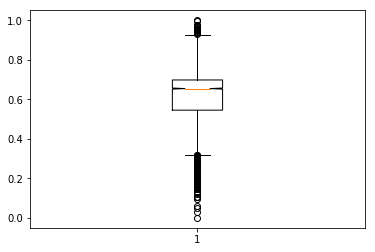

In [191]:
plt.boxplot(n.flatten(), 1)

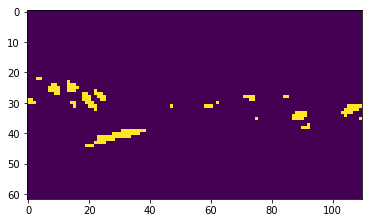

In [196]:
n2 = np.logical_or(n > 0.9,  n < 0.3)
plt.imshow(n2)

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  255.,  255., ...,  255.,  255.,    0.],
       [   0.,  255.,  255., ...,  255.,  255.,    0.],
       ..., 
       [   0.,  255.,  255., ...,  255.,  255.,    0.],
       [   0.,  255.,  255., ...,  255.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

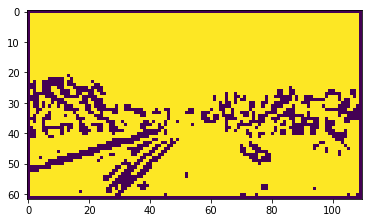

In [193]:
DIST = 10
res = np.zeros(tolink.shape)
for x in xrange(1, tolink.shape[0] - 1):
    for y in xrange(1, tolink.shape[1] - 1):
        if abs(tolink[x, y] - tolink[x + 1, y]) < DIST or \
           abs(tolink[x, y] - tolink[x - 1, y]) < DIST or \
           abs(tolink[x, y] - tolink[x, y + 1]) < DIST or \
           abs(tolink[x, y] - tolink[x, y - 1]) < DIST:
            res[x, y] = 255
               
plt.imshow(res)
res   


array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    1.66557179,    2.58268921, ...,    1.31144295,
           0.9170908 ,    0.        ],
       [   0.        ,    1.33353997,    2.22018449, ...,    1.67804952,
           1.78104645,    0.        ],
       ..., 
       [   0.        ,   41.17480057,   37.70464278, ...,  130.98746657,
         139.22258196,    0.        ],
       [   0.        ,   25.35648855,   13.9004721 , ...,  247.67758574,
         269.88192527,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

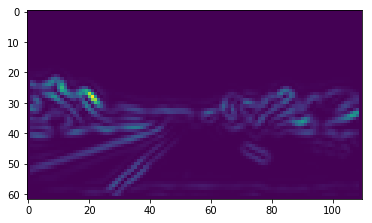

In [194]:
DIST = 10
res = np.zeros(tolink.shape)
for x in xrange(1, tolink.shape[0] - 1):
    for y in xrange(1, tolink.shape[1] - 1):
         s = np.array([(tolink[x, y] - tolink[x + 1, y]),
           (tolink[x, y] - tolink[x - 1, y]),
           (tolink[x, y] - tolink[x, y + 1]),
           (tolink[x, y] - tolink[x, y - 1])])
         res[x, y] = s.var()
               
plt.imshow(res)
res

In [195]:
tolink.dtype, res.dtype, tolink.max(), res.max()

(dtype('float64'), dtype('float64'), 309.34363251795679, 18045.774869279947)